Read file: 


In [15]:
f = open("test.txt")
print(f.read())

hello world
hello world
hello world
hello world
hello world
hello world



In [16]:
print(f.readline())
print(f.readline())


In [30]:
f = open("test.txt")
f.seek(0)
i = 0
for x in f:
    print(i, x)
    words = x.split()
    print("line ", i, " has ", len(words), " words")
    i += 1

0 hello world

line  0  has  2  words
1 hello world

line  1  has  2  words
2 hello world

line  2  has  2  words
3 hello world

line  3  has  2  words
4 hello world

line  4  has  2  words
5 hello world

line  5  has  2  words


In [31]:
f.close()


## Arrays

In [25]:
family = ["Mama", "Papa", "Son"]
secondArray = [ x for x in family ]
print(secondArray)

['Mama', 'Papa', 'Son']


In [35]:
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
X, y = make_regression(n_samples=200, random_state=2)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
regr = MLPRegressor(random_state=1, max_iter=5000).fit(X_train, y_train)
regr.predict(X_test[:2])
regr.score(X_test, y_test)

0.3923218350236053

In [20]:
import re
from sklearn.model_selection import validation_curve
from sklearn import neural_network as nn
import numpy as np
from sklearn.model_selection import train_test_split


def importData(file, multiplier = 1):
    dataset = open(file, "r")
    X = [[]]
    X.pop(0)
    for item in dataset:
        sample = item.split(", ")
        if len(sample) < 125:
            continue
        samplesFloat = [ float(s) * multiplier for s in sample]
        X.append(samplesFloat)
    dataset.close()
    return X

def parseDataSets(dir, multiplier = 1):
    listTmpFiles = os.listdir(dir)
    # print(listTmpFiles)
    inputs = [[]]
    outputs = [[]]
    inputs.pop(0)
    outputs.pop(0)
    for file in listTmpFiles:
        if re.match("trainingSet", file):
            newInputs = importData(dir + "/" + file, multiplier)
            if re.match(".*input.txt", file):
                for item in newInputs:
                    inputs.append(item)
            else:
                for item in newInputs:
                    outputs.append(item)
    return inputs, outputs


In [11]:
import matplotlib.pyplot as plt


X = importData("/tmp/trainingSet-NaiveMls_cff-0.000000_gr-0.020000_iv--0.500000_sf-1.000000_bi-1_maxs-100_mlss100_cp-20_of-0.500000_cf-0.500000_domain--3,-3,-3,3,3,3_93_input.txt")
y = importData("/tmp/trainingSet-NaiveMls_cff-0.000000_gr-0.020000_iv--0.500000_sf-1.000000_bi-1_maxs-100_mlss100_cp-20_of-0.500000_cf-0.500000_domain--3,-3,-3,3,3,3_93_output.txt")

assert(len(X) == len(y))
error = 0
for i in range(0, len(X)-1):
    assert(len(X[i]) == 125)
    for j in range(0, 124):
        error += (X[i][j] - y[i][j]) * (X[i][j] - y[i][j])
        
print("error:", error)


X_train, X_test, y_train, y_test = train_test_split(np.array(X), np.array(y), random_state=2, test_size=0.3)
print(X_train.shape)
print(y_train.shape)
print(np.array(X).shape)
print(np.array(y).shape)

regr = nn.MLPRegressor(hidden_layer_sizes=125, 
                       max_iter=2000,
                       random_state=1996, 
                       tol=0.001, 
                       verbose=False)

regr.fit(X_test, y_test)
local_param_range = np.logspace(-5, 0, 10)
print(local_param_range)

train_scores, test_scores = validation_curve(regr, 
                    X_test, 
                    y_test, 
                    "alpha",
                    param_range = local_param_range,
                    cv=5)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title("Validation Curve with SVM")
plt.xlabel(r"$\gamma$")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
lw = 1
plt.semilogx(local_param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(local_param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(local_param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(local_param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()







FileNotFoundError: [Errno 2] No such file or directory: '/tmp/trainingSet-NaiveMls_cff-0.000000_gr-0.020000_iv--0.500000_sf-1.000000_bi-1_maxs-100_mlss100_cp-20_of-0.500000_cf-0.500000_domain--3,-3,-3,3,3,3_93_input.txt'

In [153]:
print(history.history)
if os.path.exists("/tmp/latest_model"):
    shutil.rmtree("/tmp/latest_model")
model.save('/tmp/keras_model.h5', include_optimizer=False)


{'loss': [0.07637602835893631, 0.038962848484516144, 0.03356106951832771, 0.03152105212211609, 0.03006901778280735, 0.02908400446176529, 0.02825010195374489, 0.027641339227557182, 0.027260545641183853, 0.02683977223932743], 'mean_absolute_error': [0.07637602835893631, 0.038962848484516144, 0.03356106951832771, 0.03152105212211609, 0.03006901778280735, 0.02908400446176529, 0.02825010195374489, 0.027641339227557182, 0.027260545641183853, 0.02683977223932743], 'val_loss': [0.06932580471038818, 0.05376264080405235, 0.04238416627049446, 0.048063818365335464, 0.03999197483062744, 0.05170994624495506, 0.051992323249578476, 0.04869969189167023, 0.05459430441260338, 0.05036947876214981], 'val_mean_absolute_error': [0.06932580471038818, 0.05376264080405235, 0.04238416627049446, 0.048063818365335464, 0.03999197483062744, 0.05170994624495506, 0.051992323249578476, 0.04869969189167023, 0.05459430441260338, 0.05036947876214981]}


In [50]:
from tensorflow import keras
from tensorflow.keras import layers
import os
import shutil
from livelossplot import PlotLossesKeras
inputs, outputs = parseDataSets("/home/ivan/RWTH/thesis/testset/")


X_tr, X_val, y_tr, y_val = train_test_split(np.array(inputs), np.array(outputs), random_state=5, test_size=0.1)
input_layer = keras.Input(shape=(125), name="float32")
x = keras.layers.Dense(125, activation="tanh")(input_layer)
hl_arch = [100, 75, 50, 75, 100]
for arch in hl_arch:
    x = keras.layers.Dense(arch, activation="tanh")(x)
# x = layers.Dense(50, activation="tanh", name="dense_1")(inputs)
# # x = keras.layers.Dropout(rate=0.2, seed=16)(x)
# x = layers.Dense(50, activation="tanh", name="dense_2")(x)
# x = keras.layers.Dropout(rate=0.2, seed=16)(x)
output_layer = layers.Dense(125, activation=keras.activations.linear, name="predictions")(x)

model = keras.Model(inputs=input_layer, outputs=output_layer)
model.summary()
model.compile(
    optimizer=keras.optimizers.Adam(),  # Optimizer
    # Loss function to minimize
    loss=keras.losses.MeanAbsoluteError(),
    # List of metrics to monitor
    metrics=[keras.metrics.MeanAbsoluteError()],
)

print(X_tr.shape)
print(y_tr.shape)
print(X_val.shape)
print(y_val.shape)
print("Fit model on training data")
#pretrain model to raise itself



Model: "model_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
float32 (InputLayer)         [(None, 125)]             0         
_________________________________________________________________
dense_1 (Dense)              (None, 125)               15750     
_________________________________________________________________
dense_2 (Dense)              (None, 100)               12600     
_________________________________________________________________
dense_3 (Dense)              (None, 75)                7575      
_________________________________________________________________
dense_4 (Dense)              (None, 50)                3800      
_________________________________________________________________
dense_5 (Dense)              (None, 75)                3825      
_________________________________________________________________
dense_6 (Dense)              (None, 100)               760

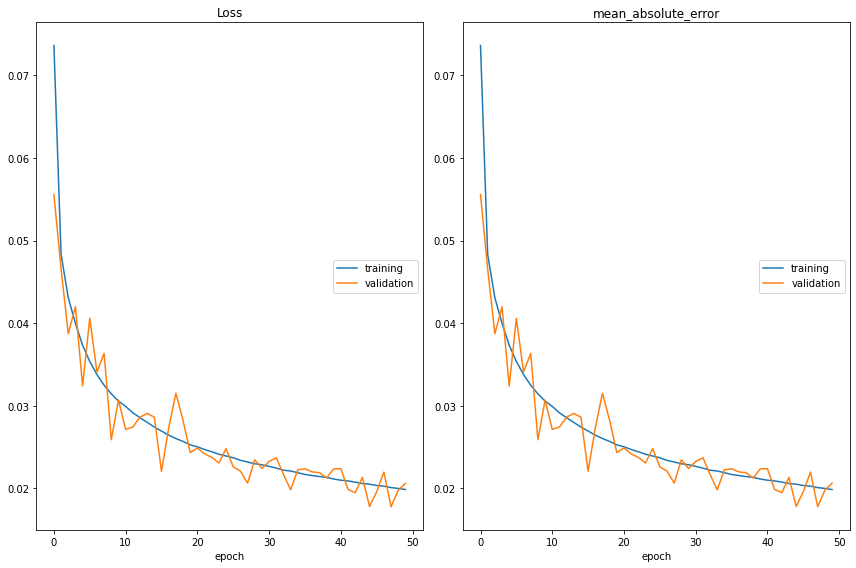

Loss
	training         	 (min:    0.020, max:    0.074, cur:    0.020)
	validation       	 (min:    0.018, max:    0.056, cur:    0.021)
mean_absolute_error
	training         	 (min:    0.020, max:    0.074, cur:    0.020)
	validation       	 (min:    0.018, max:    0.056, cur:    0.021)


In [51]:
history = model.fit(
    X_tr,
    X_tr,
    batch_size=128,..0
    epochs=50,
    validation_data = (X_val, X_val),
    shuffle=True,
    # We pass some validation for
    # monitoring validation loss and metrics
    # at the end of each epoch
    callbacks=[PlotLossesKeras(), keras.callbacks.ModelCheckpoint('/tmp/initialisation_training.h5')],
    verbose=0,
    workers=8,
    use_multiprocessing=True
)

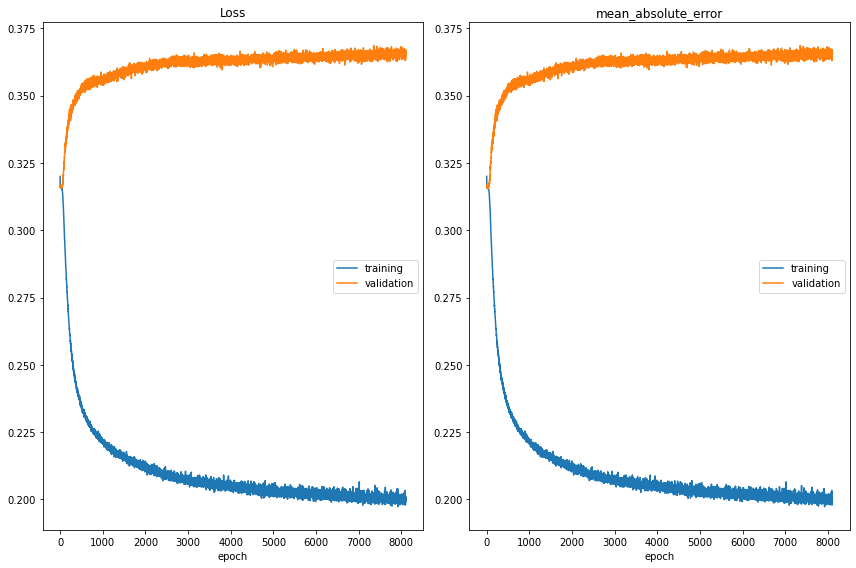

Loss
	training         	 (min:    0.197, max:    0.320, cur:    0.200)
	validation       	 (min:    0.316, max:    0.369, cur:    0.366)
mean_absolute_error
	training         	 (min:    0.197, max:    0.320, cur:    0.200)
	validation       	 (min:    0.316, max:    0.369, cur:    0.366)


KeyboardInterrupt: 

In [58]:
model = keras.models.load_model('/tmp/initialisation_training.h5')
inp_tst, inp_val, out_tst, out_val = train_test_split(np.array(inputs), np.array(outputs), random_state=8, test_size=0.2)

model.compile(    
    optimizer=keras.optimizers.Adam(),  # Optimizer
    # Loss function to minimize
    loss=keras.losses.MeanAbsoluteError(),
    # List of metrics to monitor
    metrics=[keras.metrics.MeanAbsoluteError()],
)
history = model.fit(
    inp_tst,
    out_tst,
    batch_size=128,
    epochs=500000,
    validation_data = (inp_val, out_val),
    # We pass some validation for
    # monitoring validation loss and metrics
    # at the end of each epoch
    callbacks=[PlotLossesKeras(), keras.callbacks.ModelCheckpoint('/tmp/final_training.h5')],
    verbose=0,
    workers=8,
    use_multiprocessing=True
)


In [151]:
test = []

test.append([x for x in range(0,125)])
print(np.array(test).shape)
model.predict(np.array(test))


(1, 125)


array([[-0.17259249, -0.11923449, -0.3383183 , -0.20913087, -0.391695  ,
         0.0192877 , -0.204753  , -0.24578074, -0.09130128, -0.4991111 ,
         0.06181413,  0.13010938,  0.3186186 ,  0.02535849, -0.3092293 ,
         0.24220392,  0.14907515,  0.20305412,  0.03240289,  0.15379599,
         0.15030104,  0.08524663,  0.06766559,  0.0118548 , -0.02270105,
         0.00504993,  0.00495349, -0.26521558, -0.10590687, -0.21737593,
         0.25152656, -0.00847897, -0.13310905,  0.20925061, -0.11885033,
         0.28719258,  0.24148405,  0.43930984,  0.2862868 ,  0.02633039,
         0.39739633,  0.3430109 ,  0.39296278,  0.3059886 ,  0.40738025,
         0.49861825,  0.3529569 ,  0.41594398,  0.359395  ,  0.44680193,
         0.08494195, -0.01582766, -0.19278605, -0.08520427,  0.06528063,
         0.30905378, -0.00522746, -0.01636922,  0.28763267,  0.18488081,
         0.31737208,  0.24471547,  0.49468803,  0.5193619 ,  0.35303637,
         0.5295412 ,  0.31080374,  0.56198937,  0.4